## Importer les librairies

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

---
## Faire une Analyse en composantes principales

C:\Users\thiev\AppData\Local\Temp\ipykernel_13432\3147336609.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/Cleaned_Dataframe.csv',sep=';')


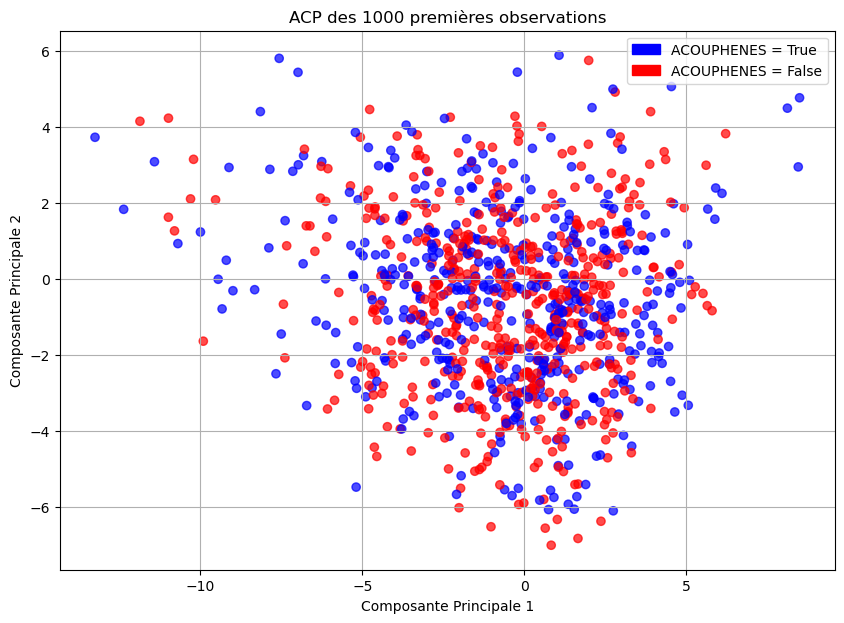

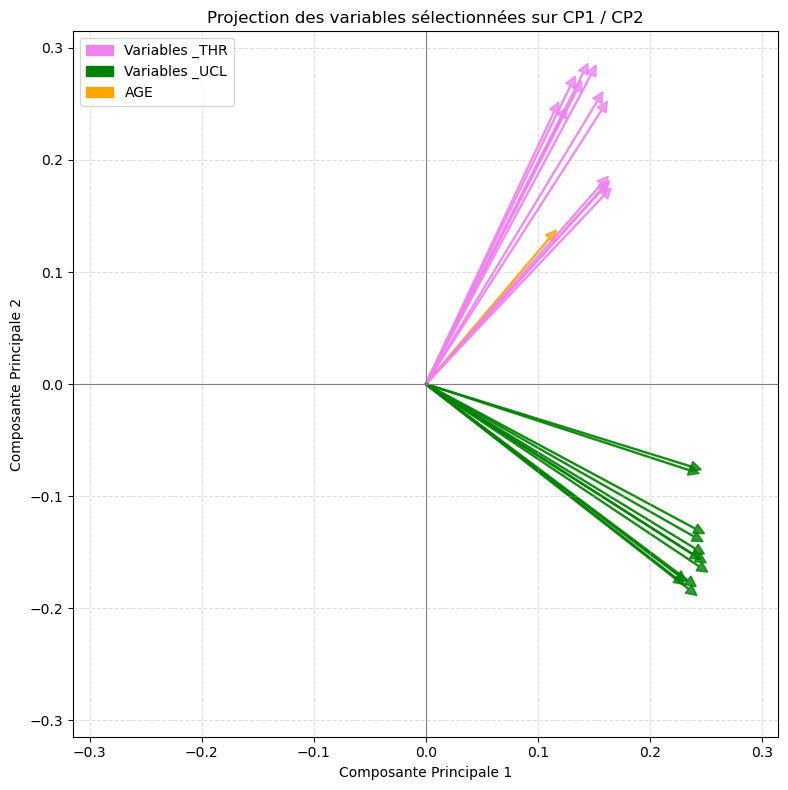

In [10]:
df = pd.read_csv('../../Data/Cleaned_Dataframe.csv',sep=';')
df = df.dropna()
X = df.drop(columns=['ACOUPHENES'])
X_numeric = X.select_dtypes(include=[np.number])

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# 3. Réalisation de l'ACP
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# 4. Préparation des données pour l'affichage des 1000 premières observations
n = min(1000, components.shape[0])
pc1 = components[:n, 0]
pc2 = components[:n, 1]
colors = ['blue' if val else 'red' for val in df['ACOUPHENES'].iloc[:n]]

# 5. Affichage
plt.figure(figsize=(10, 7))
plt.scatter(pc1, pc2, c=colors, alpha=0.7)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('ACP des 1000 premières observations')
# Légende personnalisée
blue_patch = mpatches.Patch(color='blue', label='ACOUPHENES = True')
red_patch = mpatches.Patch(color='red', label='ACOUPHENES = False')
plt.legend(handles=[blue_patch, red_patch])
plt.grid(True)
plt.show()


# 1) loadings bruts (coordonnées dans [−1,1])
loadings = pca.components_.T   # shape = (n_variables, 2)

# 2) Préparation de la figure
fig, ax = plt.subplots(figsize=(8,8))
lim = np.max(np.abs(loadings)) * 1.1
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axhline(0, color='grey', linewidth=0.8)
ax.axvline(0, color='grey', linewidth=0.8)
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_aspect('equal', 'box')

# 3) Tracé des flèches colorées sans texte
for i, var in enumerate(X_numeric.columns):
    if var.endswith('_THR'):
        col = 'violet'
    elif var.endswith('_UCL'):
        col = 'green'
    elif var == 'AGE':
        col = 'orange'
    else:
        continue

    x, y = loadings[i, 0], loadings[i, 1]
    ax.arrow(0, 0, x, y,
             head_width=0.03*lim, head_length=0.03*lim,
             length_includes_head=True,
             color=col, alpha=0.8)

# 4) Légende manuelle
thr_patch = mpatches.Patch(color='violet', label='Variables _THR')
ucl_patch = mpatches.Patch(color='green', label='Variables _UCL')
age_patch = mpatches.Patch(color='orange', label='AGE')
ax.legend(handles=[thr_patch, ucl_patch, age_patch], loc='upper left')

# 5) Titres
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_title('Projection des variables sélectionnées sur CP1 / CP2')

plt.tight_layout()
plt.show()
